In [6]:
from tsapix.envbase import *
from tsapix.spider.eastmoney import HistPX
from tsapix.dimvals import maps, code_name_mapdict, load_maps, load_histpx_cubes

## Load Data

In [1]:
# maps = load_maps()
# code_name_mapdict = maps['stock_meta']

histpx = load_histpx_cubes([
    ('d', 'bfq'),
])
xobj = histpx['d_bfq']
xpd = xobj['Close']

Maps Available Keys:  ['stock_meta', 'bkname']
Loading  d_bfq ...  Open; Close; High; Low; TradeShares; TradeAmt; ZF; AbsChg; PctChg; TurnoverRate; 


In [2]:
xobj.keys()

dict_keys(['cube', 'axes', 'Open', 'Close', 'High', 'Low', 'TradeShares', 'TradeAmt', 'ZF', 'AbsChg', 'PctChg', 'TurnoverRate'])

In [3]:
xpd.tail()

,600000,600006,600007,600008,600004
2025-09-09,14.02,7.46,21.13,3.14,9.69
2025-09-10,13.97,7.46,21.08,3.12,9.64
2025-09-11,14.12,7.57,21.33,3.15,9.65
2025-09-12,13.60,7.50,21.51,3.16,9.58
2025-09-15,13.43,7.59,21.45,3.27,9.56


## Simple tech indicators

In [4]:
xpd_ma50 = xpd.rolling(50).mean()
xpd_ma20 = xpd.rolling(20).mean()
xpd_ma10 = xpd.rolling(10).mean()
xpd_ma5 = xpd.rolling(5).mean()

std20 = xpd.rolling(20).std()
b_up = xpd_ma20 + 2*std20
b_low = xpd_ma20 - 2*std20

xpd_ma60 = xpd.rolling(60).mean()
xpd_ma120 = xpd.rolling(120).mean()

## Simple plots

600000 浦发银行;

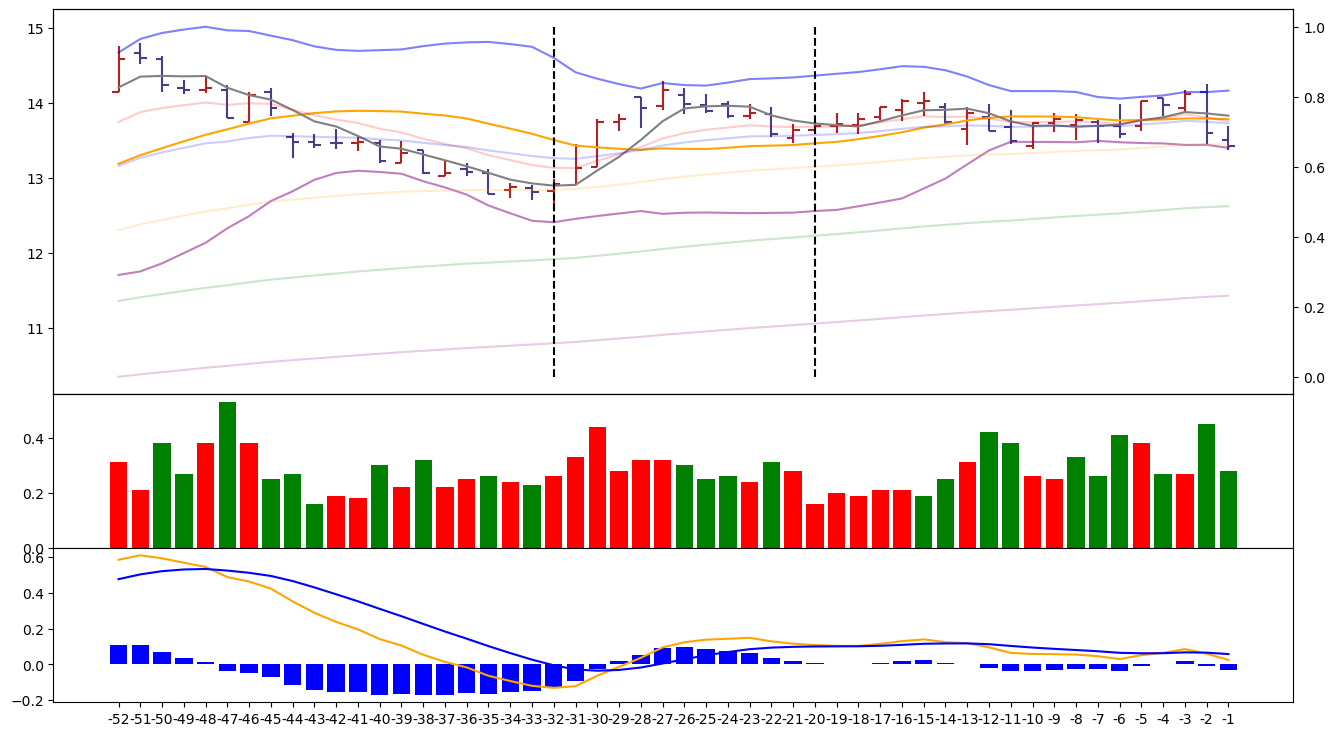

600006 东风股份;

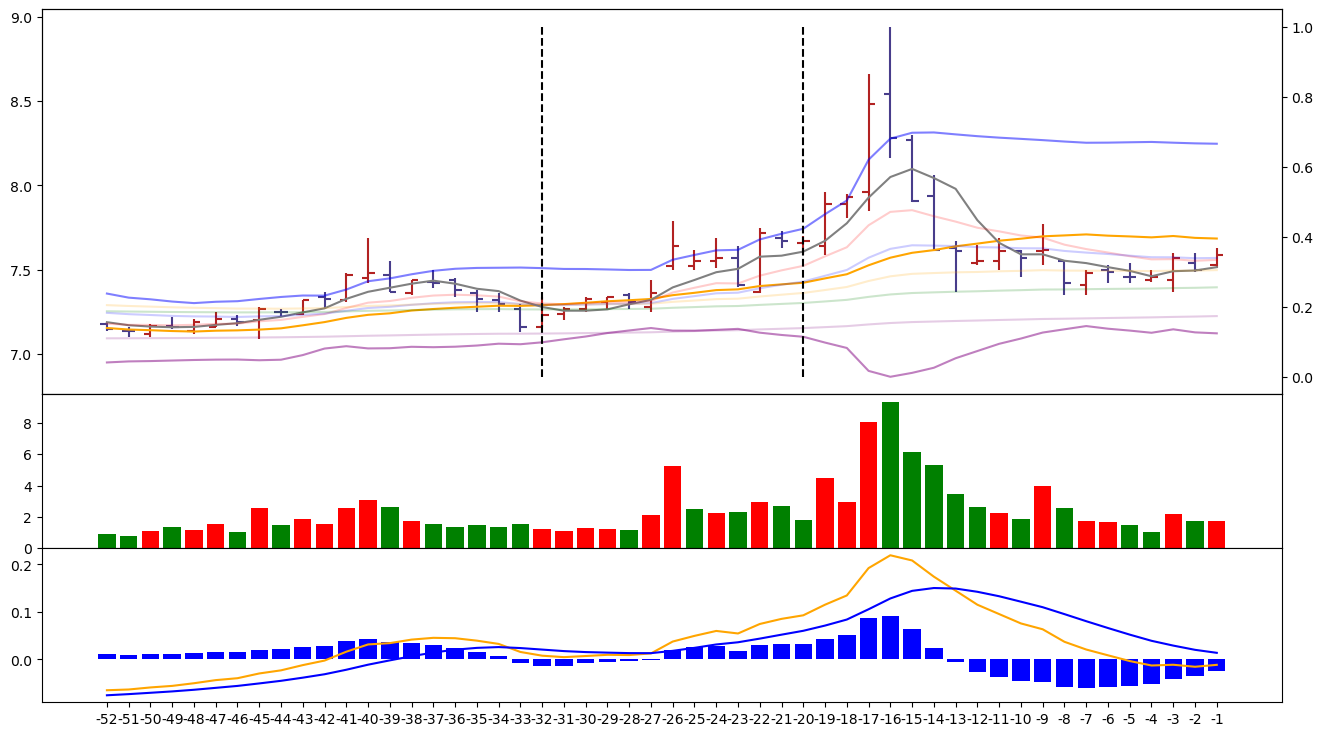

In [8]:
from tsapix.tools import cn_plot

_names = list(xpd.columns)[:2]
_ym = '2025-08'

cn_plot.obs_names_at_specific_mth_v2(_names=_names, _ym=_ym,
                          xobj=xobj, 
                          code_name_mapdict=code_name_mapdict,
                          xpd_ma20=xpd_ma20,
                          xpd_ma5=xpd_ma5,
                          b_low=b_low,
                          b_up=b_up,
                          xpd=xpd,
                          obs_step=20,)